## Midterm
## Kunal Naidu
## 30020999



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
"""
Kunal Naidu
Midterm
Status:Finished 
"""


'\nKunal Naidu\nMidterm\nStatus:Finished \n'

# Introduction

In this report we will be looking at the Laplace Equation in 1-dimension and 2-dimension. We will use them to solve specific problems.

We will start with the trying to solve Laplaces Equation in 1-dimension with initial conditions

$$
\begin{align}
V(x=0)&=0 \\
V(x=1)&=1 \\
\end{align}
$$

We will do by making a 1-dimensional grid and setting the boundary values to be 0 and 1 and itterating over the list using the equation

$$V_i = \frac{V_{i-1}+V_{i+1}}{2}$$

This equation will be applied to all values except the boundary values. After several itterations the values in the grid will relax to their supposed values.

In [2]:
class LaplaceEquation1D:
    """
    solves 1D Laplace Equation
    """
    def __init__(self, start_point=0, end_point=1, number_of_spaces=20):
        """
        Creates grid with specified end points and number of spaces

        Parameters
        ----------

        start_point:begginning end point

        end_point:last end point

        number_of_spaces: number of values between end points

        Returns
        -------

        grid: grid with specific end points and certain number of values in
        between

        """
        self.grid = np.linspace(start_point, end_point, number_of_spaces)


    def step(self, itterations=1):
        """
        taking the average of the two surrounding values and stepping each
        value excluding the boundary points

        Parameters
        ----------

        grid: grid

        itterations: number of itterations

        Returns
        -------
        grid: itterated grid
        """
        grid = self.grid
        for j in range(itterations):
            for i in range(1, len(grid)-2):
                grid[i] = (grid[i-1]+grid[i+1])/2
        self.grid = grid
        return self

    def print_grid(self):
        """
        printing out grid
        """
        print(self.grid)
        return self

    def plot(self, title, x_axis, y_axis, label, legend=False):
        """
        ploting grid
        """
        plt.plot(self.grid, label=label)
        plt.title(title)
        plt.xlabel(x_axis)
        plt.ylabel(y_axis)
        if legend is False:
            pass
        else:
            plt.legend(loc=0)
        return self

    def reset(self):
        """
        resets grid to initail values
        """
        for i in range(1, len(self.grid)-2):
            self.grid[i] = 0
        return self
 

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]


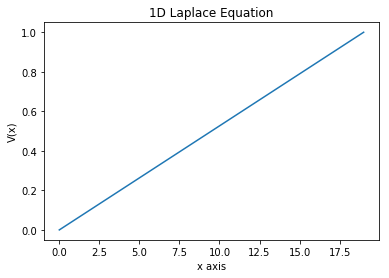

In [3]:
obj_1 = LaplaceEquation1D()
obj_1.print_grid().step(1).plot(title="1D Laplace Equation", x_axis="x axis",
                                y_axis="V(x)", label="laplace")


In [4]:
def percent_error(theoredical, grid):
    """
    calculates the percent error between the theoredical grid and the
    calculated grid

    Parameters
    ----------

    theoredical: theoredical grid

    grid: calculated grid

    Returns
    -------

    average_percent _error: percent error
    """
    total_percent_error = 0
    for i, j in zip(theoredical, grid):
        if i == j:
            percent_error = 0
        else:
            percent_error = (i-j)/j
        total_percent_error += abs(percent_error)
    average_percent_error = str((total_percent_error/len(theoredical))*100)+"%"
    return average_percent_error


After calculating the grid we will actually solve the solution to compare our answers.

\begin{align}
\frac{\partial^2 }{\partial x^2} V(x) = 0 \\
\frac{\partial}{\partial x} V(x) = a \\
V(x) = a x + b \\
\end{align}
using initial conditions $V(0)=0$ and $V(1)=1$
\begin{align}
V(0) = a * 0 + b = 0\\
b=0 \\
V(x) = a x \\
\end{align}

\begin{align}
V(1) = a * 1  = 1 \\
a=1 \\
V(x)=x
\end{align}



In [5]:
theoredical = np.linspace(0, 1, 20)
print(percent_error(theoredical, obj_1.grid))


0.0%


We can see after just one itteration we got the solution. This mainly because we initally chose a grid that was very close to the solution therefore one itteration was good enough. This just comes to show how knowing the solution or knowing what you expect the solution to be can help to reduce computation time.

Now instead we will use a grid with all zeros between the boundary points. This will hopefully show how our method actually works.


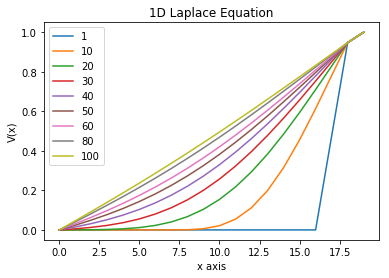

In [6]:
obj_1_2 = LaplaceEquation1D()
itterations = [1, 10, 20, 30, 40, 50, 60, 80, 100]
labels = []
for i in itterations:
    labels.append(str(i))
obj_1_2.reset()
for i, j in zip(itterations, labels):
    obj_1_2.step(i).plot(title="1D Laplace Equation", x_axis="x axis",
                         y_axis="V(x)",label=j, legend=True)
    obj_1_2.reset()


In [7]:
size = 20
itterations = 300
obj_1_2.reset()
obj_1_2.step(itterations)
theoredical = np.linspace(0, 1, size)
print(percent_error(theoredical, obj_1_2.grid))


0.012260733655931878%


Now we can see how our method works. The values come into place from one side to the other like a wave. We can also notice that this time it took us 300 itterations to get a percent error of only 0.01%

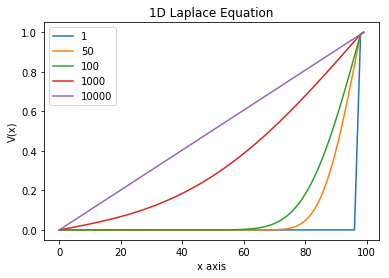

In [8]:
obj_1_3 = LaplaceEquation1D(number_of_spaces=100)
itterations = [1, 50, 100, 1000, 10000]
labels = []
for i in itterations:
    labels.append(str(i))
obj_1_3.reset()
for i, j in zip(itterations, labels):
    obj_1_3.step(i).plot(title="1D Laplace Equation", x_axis="x axis",
                         y_axis="V(x)", label=j, legend=True)
    obj_1_3.reset()


In [9]:
itterations = 10000
size = 100
obj_1_3.reset()
obj_1_3.step(itterations)
theoredical = np.linspace(0, 1, size)
print(percent_error(theoredical, obj_1_3.grid))


0.0040674983378553835%


Creating a larger grid made it take longer to get similar accuracy. It took 10,000 itterations. This goes to show that increasing the size of the grid doesn't help us in this case because we get a linear trend. Maybe if there was a charge in the space which would result in curves in the potential graph. Having a larger grid can better tell us the shape of the curve.

Now we will look at the Laplace Equation in 2-dimensions. This time we will look at the griffiths example.

Two infinitely long grounded metal plates lie parallel to the $x-z$ plane, one at $y=0$, the other at $y=a=5~cm$.  They are connected at $x=\pm b=\pm 4~cm$ by metal strips maintained at a constant potential $V_0=4~volts$ to form a rectangular channel.  A thin layer of insulation at each corner allows the sides to be maintained at different potentials.

A solution to this boundary value problem can be obtained through separation of variables

  $$ V(x,y) = \frac{4 V_0}{\pi} \sum_{n=1,3,5,...} \frac{1}{n} \frac{\cosh(n \pi x / a)}{\cosh (n \pi b / a)} \sin(n \pi y / a)$$

Similar to above we will create a 2-dimensional grid with specific boundary values. Now the potential will be determined through the equation 

$$V(x_i, y_j) = V_{i,j} = \frac{V_{i-1,j} + V_{i+1,j} + V_{i,j-1} + V_{i,j+1}}{4} $$


In [10]:
class LaplaceEquation2D:
    """
    Solves 2D laplace equation
    """
    def __init__(self, number_of_spaces_x=10, number_of_spaces_y=10):
        """
        Creates grid with specified number of spaces

        Parameters
        ----------

        number_of_spaces_x: number of values between end points in the x axis

        number_of_spaces_y: number of values between end points in the y axis

        Returns
        -------

        grid: grid with certain number of values in between

        """
        self.grid = np.zeros((number_of_spaces_x, number_of_spaces_y))
        self._init_grid()

    def _init_grid(self, x_start_point=4, x_end_point=4, y_start_point=0,
                   y_end_point=0):
        """
        Sets the End Points of the Graph

        Parameters
        ----------

        x_start_point: potential of the left plate

        x_end_point: potential of the right plate

        y_start_point: potential of the lower plate

        y_start_point: potential of the upper plate

        Returns
        -------

        grid: grid with boundary values

        """
        grid = self.grid.copy()
        x, y = grid.shape
        for i in range(y):
            grid[i][0] = x_start_point
            grid[i][x-1] = x_end_point
        for j in range(x):
            grid[0][j] = y_end_point
            grid[y-1][j] = y_start_point
        self.grid = grid
        return self

    def step(self, itterations=1):
        """
        taking the average of the two surrounding values and stepping each
        value excluding the boundary points

        Parameters
        ----------

        grid: grid

        itterations: number of itterations

        Returns
        -------
        grid: itterated grid
        """
        grid = self.grid.copy()
        for k in range(itterations):
            for j in range(1, len(grid)-1):
                for i in range(1, len(grid[j])-1):
                    grid[j][i] = (grid[j][i-1]+grid[j][i+1]+grid[j+1][i]+grid[j-1][i])/4
        self.grid = grid
        return self

    def contourplot(self, grid, title):
        """
        creates a contour plot for a grid

        Parameters
        ----------

        grid: grid

        title: title for plot

        Returns
        -------

        plot

        """
        x_size = len(grid)
        y_size = len(grid[0])
        x = range(x_size)
        y = range(y_size)
        x, y = np.meshgrid(x, y)
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        ax.plot_surface(x, y, grid, rcount=25, ccount=25, cmap='summer')
        ax.set_ylabel('y axis')
        ax.set_xlabel('x axis')
        ax.set_zlabel('Potential')
        ax.set_title(title)
        return self


    def theoredical_potential(self):
        """
        calculates and plots the theoredical 2D Laplace Equation
        """
        a = 5.0
        b = 4.0
        x, y = np.meshgrid(np.linspace(-b, b, len(self.grid[0])),
                           np.linspace(0, a, len(self.grid)))
        V = np.zeros((len(self.grid[0]), len(self.grid)))
        for n in range(1, 200, 2):
            V += (1.0/n)*(np.cosh(n*np.pi*x/a))*(np.sin(n*np.pi*y/a)*
                                                 (1/np.cosh(n*np.pi*b/a)))
        V *= 4.0*4.0/np.pi
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        ax.plot_surface(x, y, V, rcount=25, ccount=25, cmap ='summer')
        ax.set_ylabel('y axis')
        ax.set_xlabel('x axis')
        ax.set_zlabel('Potential')
        ax.set_title("Theoredical Griffith")
        self.theoredical = V

    def percentage_error(self):
        """
        calculates the percentage error between the theoredical matrix and the calculated matrix
        """
        mean = 0
        for i in range(len(self.theoredical)):
            for j in range(len(self.theoredical[0])):
                if self.grid[i][j] == self.theoredical[i][j]:
                    pass
                else:
                    mean = abs((self.grid[i][j]-self.theoredical[i][j])/self.theoredical[i][j])
        mean = mean/self.grid.size
        self.error = str(mean*100)+"%"
        return self


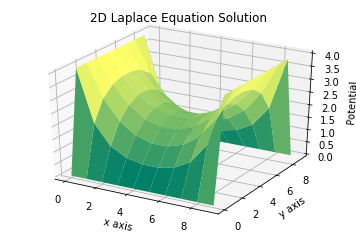

In [11]:
obj_1 = LaplaceEquation2D()
obj_1._init_grid()
obj_1.step(10000).contourplot(obj_1.grid,"2D Laplace Equation Solution")


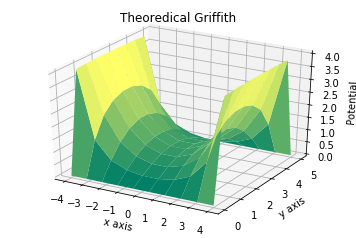

In [12]:
theoredial = obj_1.theoredical_potential()


In [13]:
obj_1.percentage_error()
obj_1.error


'1.0%'

We can see that the created graph and the theoredical graph look similar. They have a 1.0% error and this error is probably from the different scaling.

Now we will look at another example.

A coaxial cable has inner conductor radius of $r_a=1~mm$ and outer conductor radius of $r_b=5~mm$.  Assume that the outer conductor is grounded and the inner conductor is at potential $V_0=9~volts$.

We will still work in cartesian coordinates for this example. The difficulty of this is setting up our graph with our inital conditions and our stepper function. We will need to be able to determine when we are in or out of a certain circle.

The potential will take the same equation as the 2-dimensional Laplacian created previously.

In [14]:
class LaplaceEquation2DCable:
    """
    Solves 2D laplace equation for a cable
    """
    def __init__(self, number_of_spaces_x=10, number_of_spaces_y=10):
        """
        Creates grid with specified number of spaces

        Parameters
        ----------

        number_of_spaces_x: number of values between end points in the x axis

        number_of_spaces_y: number of values between end points in the y axis

        Returns
        -------

        grid: grid with certain number of values in between

        """
        width = number_of_spaces_x+1
        height = number_of_spaces_y+1
        self.grid = [[1 for x in range(width)] for y in range(height)]

    def circle_generator(self, r, epsilon, value):
        """
        generates circle in grid
        """
        grid = self.grid
        height = len(grid)+1
        width = len(grid)+1
        a, b = len(grid)/2, len(grid)/2
        for y in range(height):
            for x in range(width):
                if abs((x-a)**2 + (y-b)**2 - r**2) < epsilon**2:
                    grid[y][x] = value
        self.grid = grid

    def boundary(self):
        """
        sets values around outter inital condition to zero
        """
        grid = self.grid
        for i in range(len(grid)):
            stop = False
            zeros = 0
            for j in range(len(grid[i])):
                if grid[i][j] == 0:
                    zeros += 1
                if grid[i][j] == 1 and stop == False:
                    grid[i][j] = 0
                elif grid[i][j] == 0 and stop == False and zeros <=3:
                    try:
                        if grid[i][j+1] == 1:
                            stop = True
                    except IndexError:
                        pass
                elif grid[i][j] == 0 and stop == True and zeros <=3:
                    try:
                        if grid[i][j+1] == 1:
                            stop = False
                    except IndexError:
                        pass
                elif grid[i][j] == 0 and zeros >= 3:
                    try:
                        if grid[i][j+1] == 1:
                            stop = False
                    except IndexError:
                        pass
        self.grid = grid

    def step(self, itterations=1):
        """
        taking the average of the two surrounding values and stepping each
        value excluding the boundary points

        Parameters
        ----------

        itterations: number of times you want to step
        """
        grid = self.grid
        for k in range(itterations):
            for i in range(len(grid)):
                for j in range(len(grid[i])):
                    total = 0
                    if grid[i][j] == 0:
                        pass
                    elif grid[i][j] == 9:
                        pass
                    else:
                        sum_directions = grid[i-1][j]+grid[i+1][j]+grid[i][j-1]+grid[i][j+1]
                        mean = sum_directions/4
                        grid[i][j] = mean
        self.grid = grid
        return self

    def contourplot(self, title):
            """
            creates a contour plot for a grid

            Parameters
            ----------

            grid: grid

            title: title for plot

            Returns
            -------

            plot

            """
            x_size = len(self.grid)
            y_size = len(self.grid[0])
            x = range(x_size)
            y = range(y_size)
            x, y = np.meshgrid(x, y)
            fig = plt.figure()
            ax = plt.axes(projection='3d')
            ax.plot_surface(x, y, self.grid, rcount=25, ccount=25, cmap='summer')
            ax.set_ylabel('y axis')
            ax.set_xlabel('x axis')
            ax.set_zlabel('Potential')
            ax.set_title(title)
            return self

    def cable_v3(self):
        """
        Calculates the potential at 3mm
        """
        grid = self.grid
        middle_grid = grid[int(len(grid)/2)]
        position_9 = [i for i, e in enumerate(middle_grid) if e == 9]
        middle = (position_9[-1]+position_9[0])/2
        length_r = position_9[-1]-middle
        r_3 = (length_r*3)+middle
        self.v_3 = middle_grid[int(r_3)]
        return self


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0]
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[0, 0, 1, 1, 1, 9, 9, 1, 1, 1, 0]
[0, 0, 1, 1, 9, 9, 9, 9, 1, 1, 0]
[0, 0, 1, 1, 9, 9, 9, 9, 1, 1, 0]
[0, 0, 1, 1, 1, 9, 9, 1, 1, 1, 0]
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Text(0,0.5,'y values')

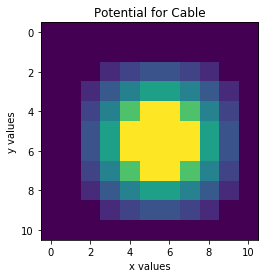

In [15]:
obj_3=LaplaceEquation2DCable()
obj_3.circle_generator(5,2.3,0)
obj_3.circle_generator(1,1.4,9)

obj_3.boundary()
for i in obj_3.grid:
    print(i)
obj_3.step(itterations=10)
plt.imshow(obj_3.grid)
plt.title('Potential for Cable')
plt.xlabel('x values')
plt.ylabel('y values')

In [16]:
obj_3.cable_v3()
obj_3.v_3

0

Text(0,0.5,'y values')

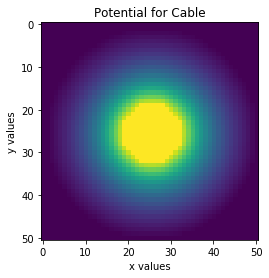

In [17]:
number_of_spaces_x=50
number_of_spaces_y=50
obj_3_1=LaplaceEquation2DCable( number_of_spaces_x, number_of_spaces_y)
r_1=number_of_spaces_x/2
r_2=r_1/5
obj_3_1.circle_generator(r_1,5,0)
obj_3_1.circle_generator(r_2,5,9)
obj_3_1.boundary()
obj_3_1.step(itterations=100)
plt.imshow(obj_3_1.grid)
plt.title('Potential for Cable')
plt.xlabel('x values')
plt.ylabel('y values')

In [18]:
obj_3_1.cable_v3()
obj_3_1.v_3

1.2496144816054933

When calculating the Laplace Equation for a cable grid size matters. As you see when we used a smaller grid size our circle looks more square. This makes sense because we are trying to make circles using miniture squares. But if we increase the grid size the circle actually takes a more circle shape. Thus giving us more accurate calculations. 

I would compare this to the theoredical but I don't know how to solve something like this.

The calculated potential at r=3mm was measured to be 1.2496. As the grid gets larger the value for this gets more accurate.

# Discussion

When creating solutions for Laplace Equations using the method we used there always a questoin asked. How big of a grid do we use. From what we did we realized that size of a grid matters on the complexities. For instance for our 1 dimensional grid. A small grid size was sufficient since the solution was a straight line. For our 2 dimensional grid a larger grid would increase the accuracy of the z plane for our surface plot. For our cable example a larger grid helped to create a more circular circle and also helps to demonstrate the change in potential as radius increases.

# Conclusion

In this report we looked at the Laplace Equation in 1 dimension and 2 dimension. We were able to solve griffiths example and also solve the cable problem.